In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carga el conjunto de datos desde el archivo CSV
data = pd.read_csv('/content/Iris.csv')

# Muestra las primeras filas del conjunto de datos para verificar su estructura
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Elimina la columna 'Species' para que el clustering sea no supervisado
X = data.drop(['Id', 'Species'], axis=1)

# Normaliza las características para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [ ]:
# Crea el modelo K-Means con un número de clústeres (clusters) específico, por ejemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

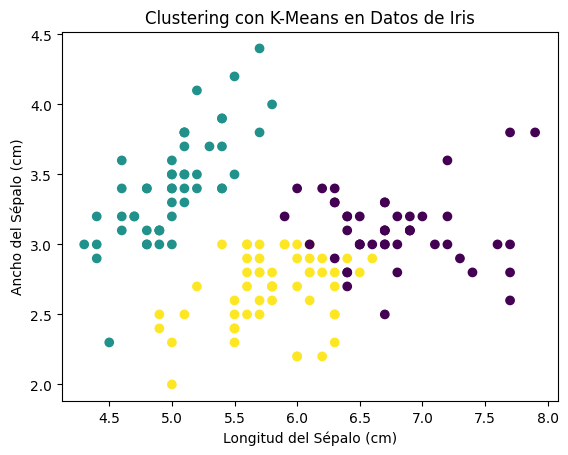

In [ ]:
# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = kmeans.labels_

# Visualiza los resultados
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.title('Clustering con K-Means en Datos de Iris')
plt.show()


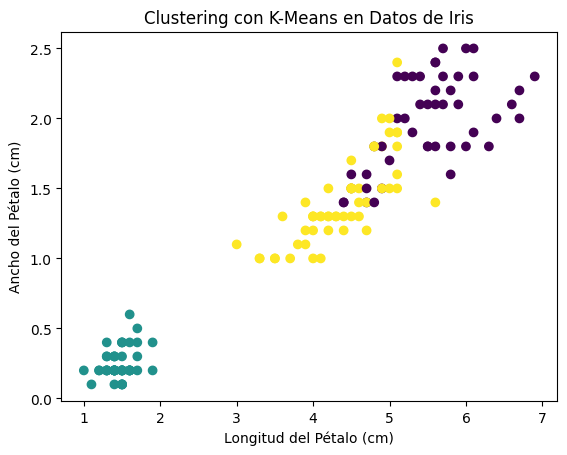

In [ ]:
# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = kmeans.labels_

# Visualiza los resultados
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.title('Clustering con K-Means en Datos de Iris')
plt.show()


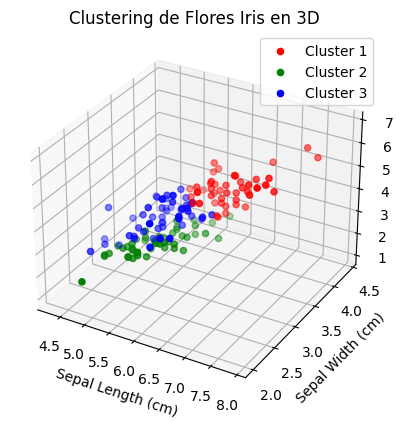

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualiza los resultados en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Asigna un color a cada clúster
colors = ['r', 'g', 'b']
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    ax.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], cluster_data['PetalLengthCm'], c=colors[i], label=f'Cluster {i + 1}')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Clustering de Flores Iris en 3D')
plt.legend()
plt.show()